# The Multiple Comparison Problem

Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as smsm

## The Four-Test Example

The following were the four p-values:

In [4]:
p1 = 0.015
p2 = 0.029
p3 = 0.008
p4 = 0.026

The plot of ordered p-values vs. rank + significance thresholds is created below:

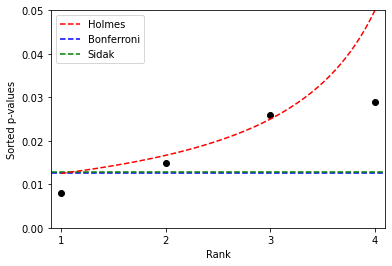

In [5]:
alpha_star = 0.05
p = [p1, p2, p3, p4]
M = len(p)
rank = np.linspace(start=1, stop=M, num=100)
plt.figure()
plt.scatter(x = range(1,M+1), y = np.sort(p), c = "black")
plt.ylim(0,max([alpha_star,max(p)]))
plt.xlim(1-0.1, M+0.1)
plt.ylabel("Sorted p-values")
plt.xlabel("Rank")
plt.xticks(ticks = range(1,M+1), labels = range(1,M+1))
# Holmes
h, = plt.plot(rank, alpha_star/(M-rank+1), color = "red", linestyle = "--", label = "Holmes")
# Bonferroni:
b = plt.hlines(y = alpha_star/M, xmin = 0, xmax = M+1, color = "blue", linestyle = "--", label = "Bonferroni")
# Sidak:
s = plt.hlines(y = 1-(1-alpha_star)**(1/M), xmin = 0, xmax = M+1, color = "green", linestyle = "--", label = "Sidak")
plt.legend(handles = [h, b, s], loc = "upper left")
plt.show()

A plot like the one above can be used to determine which null hypotheses to reject for any of the given correction methods. In particular, with the Bonferroni and Sidak corrections we reject only the null hypothesis associated with the smallest p-value (that was $H_{0,3}$). With the Holmes correction, we reject the null hypotheses associated with the smallests two p-values (these were $H_{0,3}$ and $H_{0,1}$).

Next we'll use Python to calculate the adjusted p-values for each method. We'll use the `multipletests` function from the `statsmodels.stats.multitest` package. We begin with the Bonferroni adjustment.

In [6]:
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [False False  True False]
The adjusted p-values are:  [0.06  0.116 0.032 0.104]


We see that only the adusted version of $p_3$ is below $\alpha^\star = 0.05$, meaning that with the Bonferroni correction, we only reject $H_{0,3}$. This agrees with the conclusion drawn from the plot above.

Next we consider the Sidak adjustment.

In [5]:
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "sidak")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [False False  True False]
The adjusted p-values are:  [0.05866345 0.11105085 0.03161804 0.10001385]


We see that only the adusted version of $p_3$ is below $\alpha^\star = 0.05$, meaning that with the Sidak correction, we only reject $H_{0,3}$. This agrees with the conclusion drawn from the plot above.

Finally we consider the Holm adjustment.

In [6]:
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p, alpha = 0.05, method = "holm")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True False  True False]
The adjusted p-values are:  [0.045 0.052 0.032 0.052]


We see that the adusted versions of $p_3$ and $p_1$ are both below $\alpha^\star = 0.05$, meaning that with the Holm correction, we reject $H_{0,3}$ and $H_{0,1}$. This agrees with the conclusion drawn from the plot above.